# EDA on Crazy Monkey E-commerce data

#### Presentation Link

https://drive.google.com/file/d/1SYMLBo6Ob4Oa0uvGWBTyOJtH47hdgeP9/view?usp=share_link

#### Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Loading the dataset

In [2]:
df=pd.read_csv('D:\data science analytics project\Crazy Monkey\crazy_monkey_clean.csv')

#### Taking a look at the data

In [3]:
df.head()

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,prod_name,created_at,city,state
0,27288,3550739,0,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,OnePlus One Mobile Covers,01-01-2016 00:07,mumbai,MAHARASHTRA
1,38337,3550743,0,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,01-01-2016 00:11,mumbai,MAHARASHTRA
2,29144,3550745,0,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,Pyjamas,Men's Plain Pyjamas,01-01-2016 00:12,ghaziabad,UTTAR PRADESH
3,16576,3550747,3550745,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,T-Shirts,Men's Plain Full Sleeve T-Shirts,01-01-2016 00:13,ghaziabad,UTTAR PRADESH
4,34189,3550749,3550745,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,T-Shirts,Men's Plain Sports Trim Fullsleeve T-Shirt,01-01-2016 00:13,ghaziabad,UTTAR PRADESH


In [4]:
df.shape

(41726, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41726 entries, 0 to 41725
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dummy        41726 non-null  int64 
 1   order_id     41726 non-null  int64 
 2   parent_id    41726 non-null  int64 
 3   user_id      41726 non-null  int64 
 4   price        41726 non-null  int64 
 5   quantity     41726 non-null  int64 
 6   product_id   41726 non-null  int64 
 7   size_id      41726 non-null  int64 
 8   category_id  41726 non-null  int64 
 9   cat_type     41726 non-null  object
 10  subtype      41726 non-null  object
 11  gender       41726 non-null  object
 12  subclass     41726 non-null  object
 13  prod_name    41726 non-null  object
 14  created_at   41726 non-null  object
 15  city         41726 non-null  object
 16  state        41726 non-null  object
dtypes: int64(9), object(8)
memory usage: 5.4+ MB


Changing data type of created_at column to datetime.

In [6]:
df['created_at']= pd.to_datetime(df['created_at'])

#### Checking cat_type column

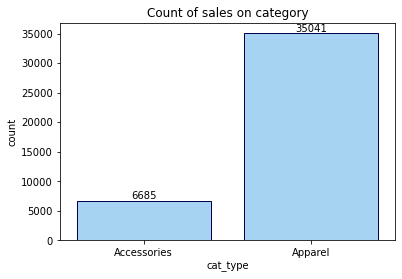

In [7]:
cnt=sns.countplot(df.cat_type,color='#99d6ff',edgecolor="#00004d")
plt.title('Count of sales on category')
for i in cnt.containers:
    cnt.bar_label(i)
plt.show()

Insight:

Apparel category is highest selling category of the two.

In [8]:
df.groupby(['cat_type'])['price'].sum()

cat_type
Accessories     6685000
Apparel        35041000
Name: price, dtype: int64

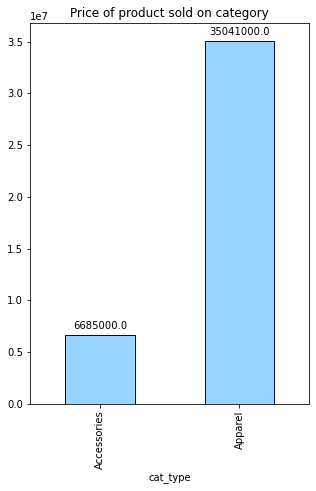

In [9]:
plt.figure(figsize=(5,7))
ax=df.groupby(['cat_type'])['price'].sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Price of product sold on category')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

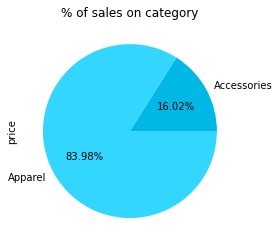

In [10]:
df.groupby(['cat_type'])['price'].sum().plot.pie(autopct="%.2f%%", colors = ["#00b8e6",'#33d6ff'])
plt.title('% of sales on category')
plt.show()

Insight:

Total sales of apparel category is highest Rs. 35041000 which is 83.98% of total sales.

### subtype column

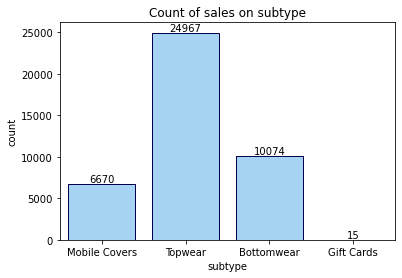

In [11]:
cnt=sns.countplot(df.subtype,color='#99d6ff',edgecolor="#00004d")
plt.title('Count of sales on subtype')
for i in cnt.containers:
    cnt.bar_label(i)
plt.show()

Insight:

The highest selling subcategory is Topwear 24967 units sold and, second highest is Bottomwear.

In [12]:
df.groupby(['subtype'])['price'].sum()

subtype
Bottomwear       10074000
Gift Cards          15000
Mobile Covers     6670000
Topwear          24967000
Name: price, dtype: int64

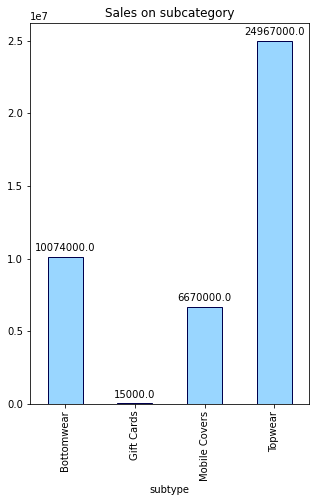

In [13]:
plt.figure(figsize=(5,7))
ax=df.groupby(['subtype'])['price'].sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Sales on subcategory')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

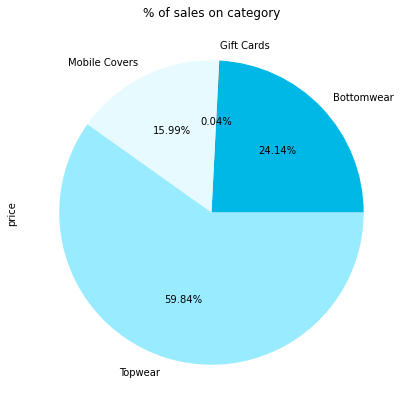

In [14]:
plt.figure(figsize=(7,7))
df.groupby(['subtype'])['price'].sum().plot.pie(autopct="%.2f%%", colors = ["#00b8e6",'#000000','#e6faff','#99ebff'])
plt.title('% of sales on category')
plt.show()

Insight:

Total sales of Topwear sub-category is highest Rs. 24967000 which is 59.84% of total sales.

Total sales of Bottomwear sub-category is second highest Rs. 10074000 which is 24.14% of total sales.

Total sales of Mobile Covers sub-category is third highest Rs. 6670000 which is 15.99% of total sales.

Total sales of Gift Card sub-category is lowest Rs. 15000 which is 0.04% of total sales.

### Gender column

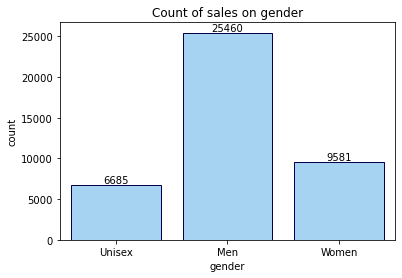

In [15]:
cnt=sns.countplot(df.gender,color='#99d6ff',edgecolor="#00004d")
plt.title('Count of sales on gender')
for i in cnt.containers:
    cnt.bar_label(i)
plt.show()

Insight:

Maximum products sold are for Mens.

Second highest is female and sales are lowest for unisex products.

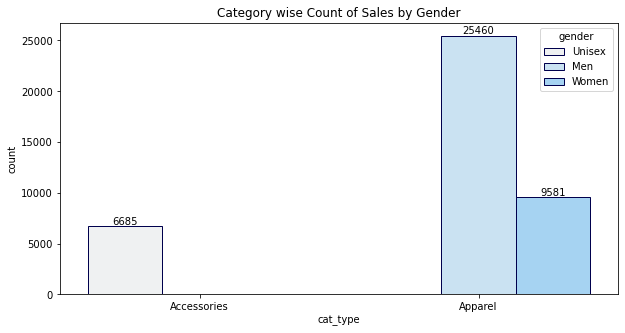

In [16]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df.cat_type,hue=df.gender,color='#99d6ff',edgecolor="#00004d")
plt.title('Category wise Count of Sales by Gender')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:
    
Men are buying more products than women.

All products of Accessories category are unisex in nature.

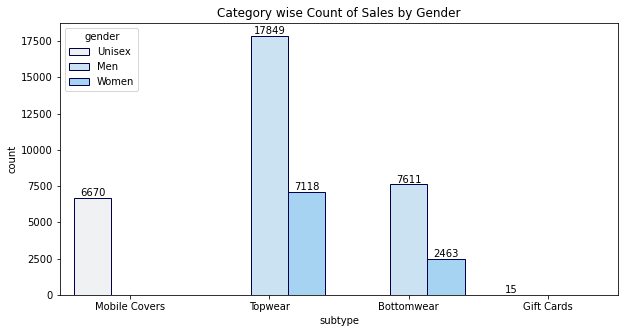

In [17]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df.subtype,hue=df.gender,color='#99d6ff',edgecolor="#00004d")
plt.title('Category wise Count of Sales by Gender')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:
    
Products for men are highest selling in Topwear and bottomwear.

The lowest sales are recorded for Gift Cards.

### subclass column

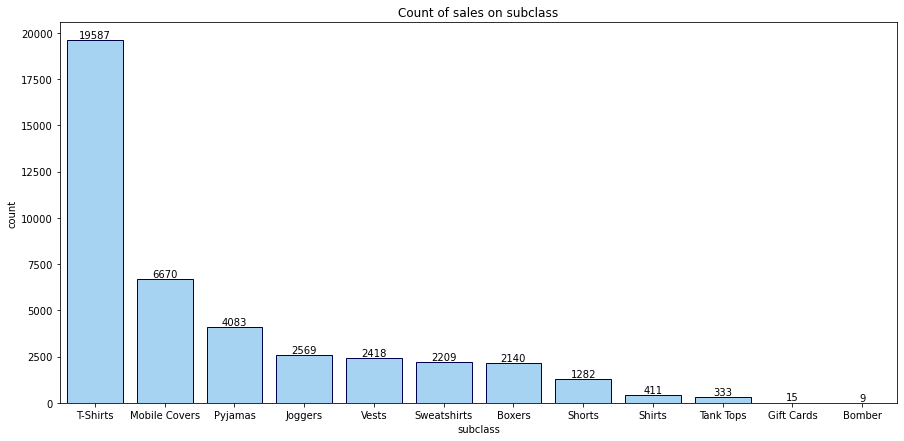

In [18]:
plt.figure(figsize=(15,7))
cnt=sns.countplot(df.subclass,color='#99d6ff',edgecolor="#00004d", order=df['subclass'].value_counts().index)
plt.title('Count of sales on subclass')
for i in cnt.containers:
    cnt.bar_label(i)
plt.show()

Insights:

Highest selling products are T-Shirts.

Second Highest products are Mobile Covers.

Lowest selling products are Gift Cards and Bomber Jackets.

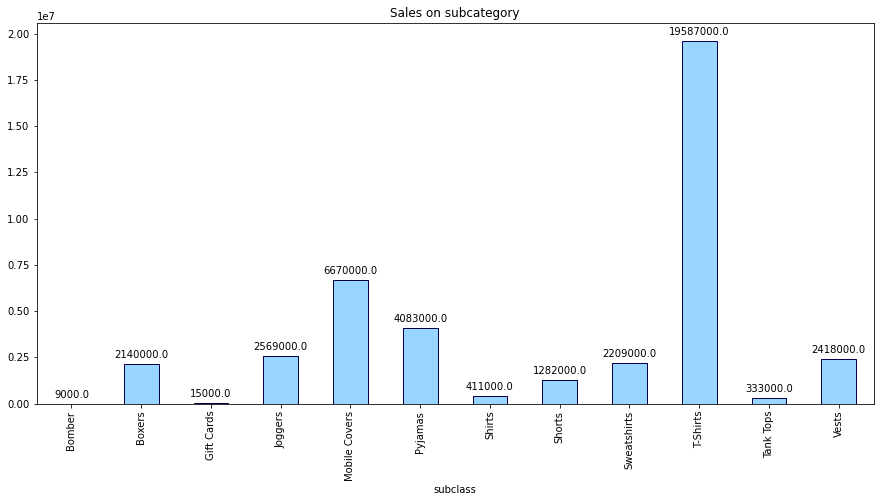

In [19]:
plt.figure(figsize=(15,7))
ax=df.groupby(['subclass'])['price'].sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Sales on subcategory')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

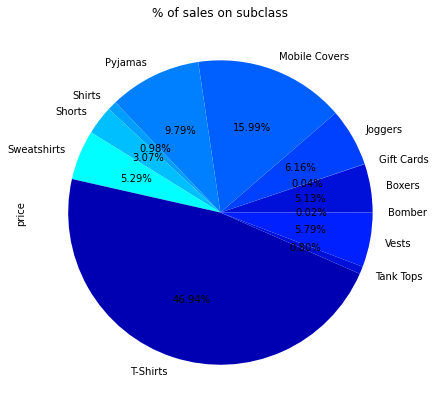

In [20]:
plt.figure(figsize=(7,7))
df.groupby(['subclass'])['price'].sum().plot.pie(autopct="%.2f%%", colors = ["#0000b3", "#0010d9", "#0020ff", "#0040ff", "#0060ff", "#0080ff", "#009fff", "#00bfff", "#00ffff"]
)
plt.title('% of sales on subclass')
plt.show()

Insights:

Top selling products are T-shirts with total sales of 19587000 rupees and 46.94% share in total sales.


### prod_name column

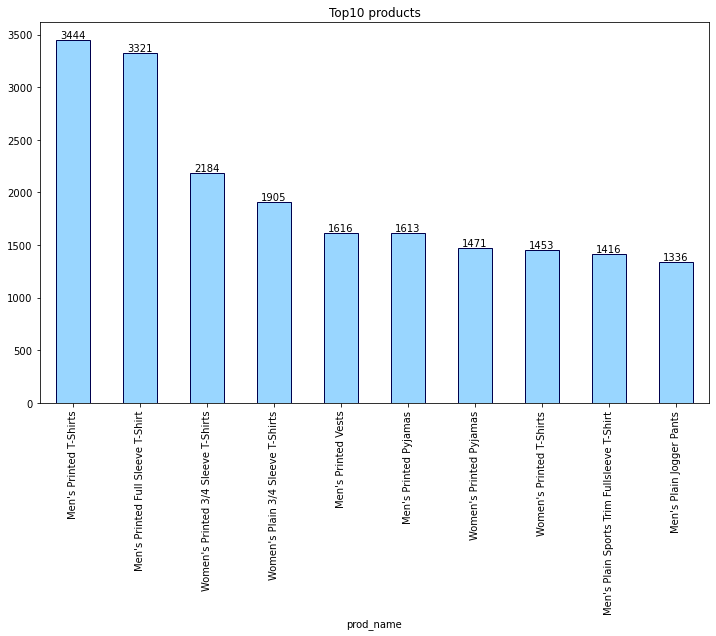

In [21]:
plt.figure(figsize=(12,7))
ax=df.groupby('prod_name').quantity.count().nlargest(n=10).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top10 products')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. From all top 10 products 6 are for mens.

2. Highest selling product is Men's printed T-Shirts 3444 units sold.

3. Top 10 products are from Apparel category.

4. 3rd highest selling product Women's printed 3/4 sleeve t-shirt is highest selling products for women.

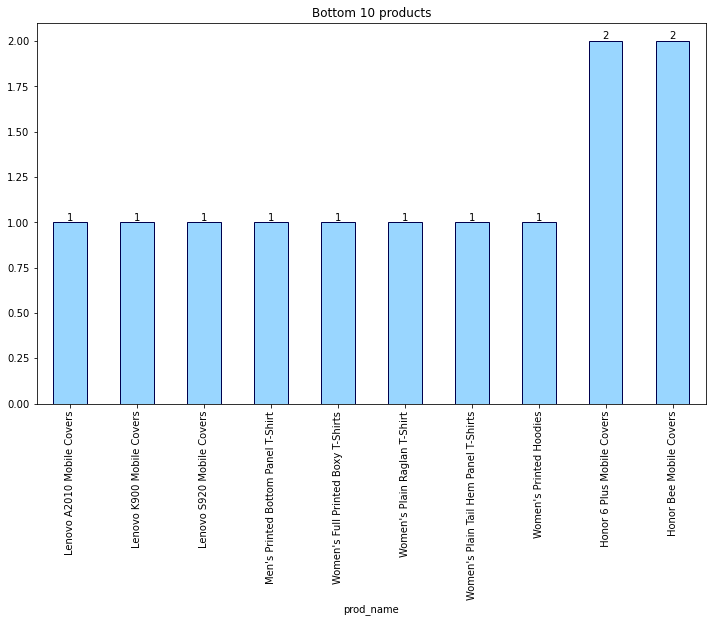

In [22]:
plt.figure(figsize=(12,7))
ax=df.groupby('prod_name').quantity.count().nsmallest(n=10).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Bottom 10 products')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Most of the Least selling products are Lenovo brand phone covers and Honour brand phone covers.

2. Out of 10least selling product 4 are women Apparel.

3. Only Men's printed Bottom Panel T-Shirts from Mens apparel is in least selling products.

### created_at column

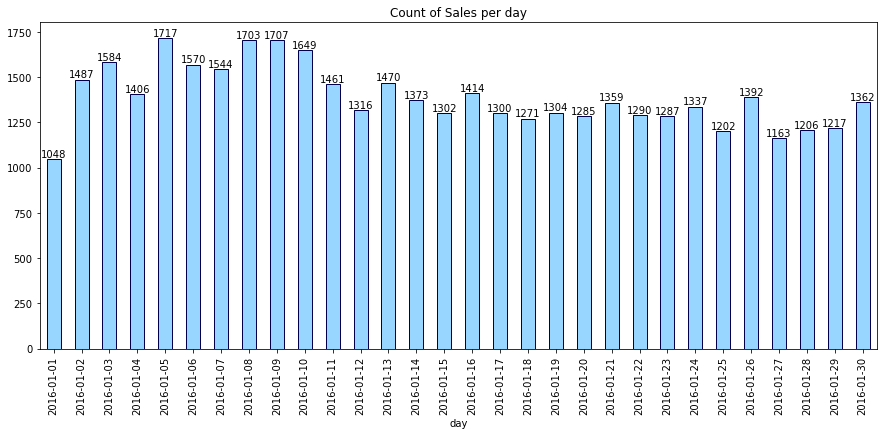

In [23]:
plt.figure(figsize=(15,6))
df['day'] = pd.to_datetime(df['created_at']).dt.to_period('D')
ax=df.groupby('day')['quantity'].count().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per day')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Highest sales were recorded on 05-01-2016. 1717 orders.

2. Sales were lowest on 01-01-2016 and after that increase in sales were seen till 10-01-2016.

3. After 10-01-2016 sales were normal and at last week less sales were recorded.

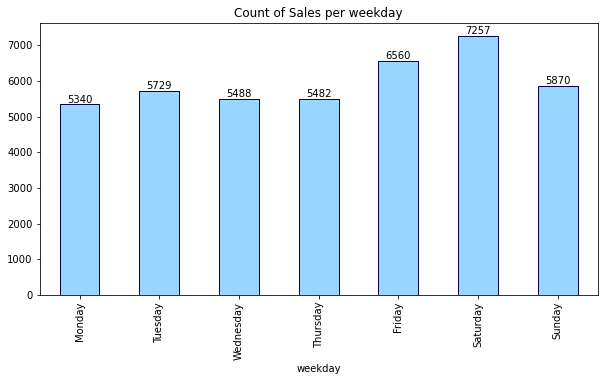

In [24]:
plt.figure(figsize=(10,5))
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['weekday'] = df['created_at'].dt.day_name()
ax=df.groupby('weekday')['quantity'].count().reindex(weekdays).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per weekday')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. High Sales were recorded on weekends.

2. Highest sales was recorded on Saturday.

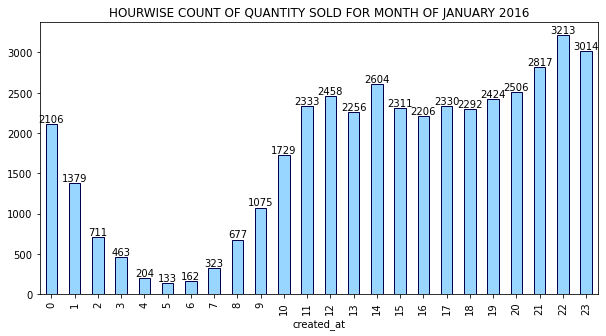

In [25]:
plt.figure(figsize=(10,5))
ax=df.groupby([df ['created_at'].dt.hour]).order_id.count().plot(kind="bar",color='#99d6ff',edgecolor="#00004d")
plt.title("HOURWISE COUNT OF QUANTITY SOLD FOR MONTH OF JANUARY 2016")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Sales are lowest at early morning and gradually starts increasing.

2. Maximum sales were recorded around 10:00 pm after that sales started to decrease gradually.

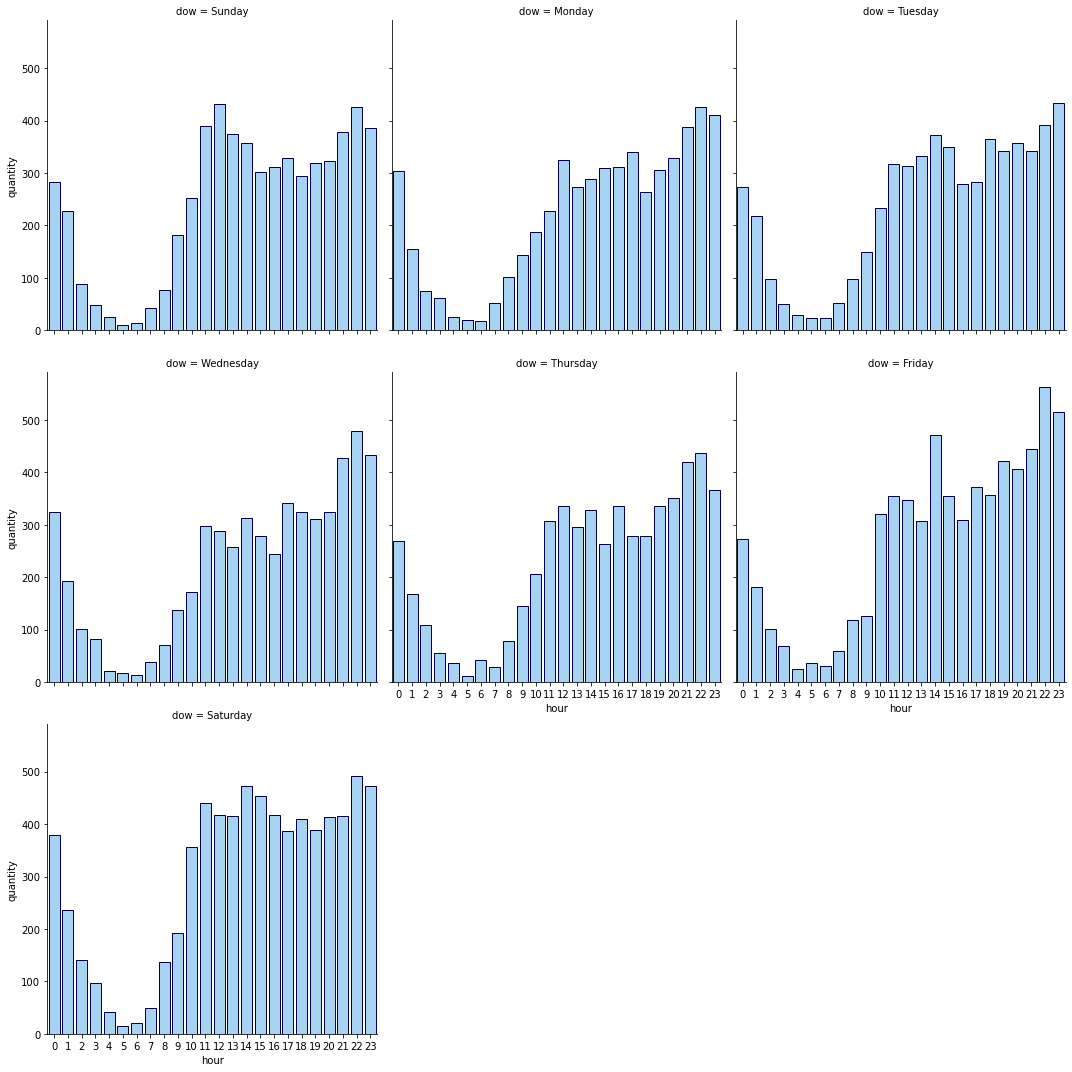

In [26]:
df['dow'] = df.created_at.dt.day_name()
df['hour'] = df.created_at.dt.hour
g = sns.FacetGrid(data=df.groupby([
    'dow',
    'hour'
]).quantity.count().to_frame(name='quantity').reset_index(), col='dow', col_order=[
    'Sunday',
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday'
], col_wrap=3,margin_titles=True,height=5, aspect=1)

# map barplot to each subplot
g.map(sns.barplot, 'hour', 'quantity',color='#99d6ff',edgecolor="#00004d")
plt.show()

Insights:
    
Almost same type of distribution is achived for all days of week for hourly count of products sold.

The only difference is between all weekdays are quantity sold as we know people buy more products at weekends.

### State column

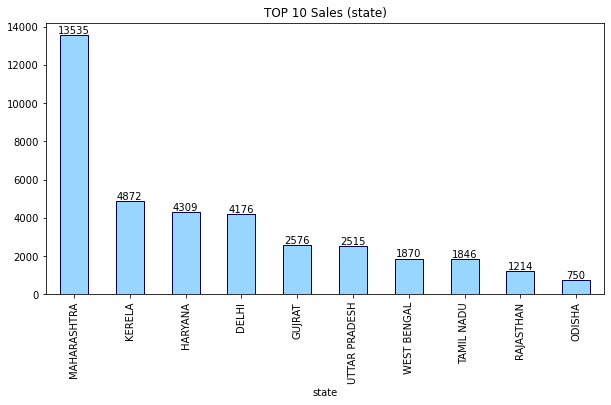

In [27]:
plt.figure(figsize=(10,5))
ax=(df.groupby(['state'])['quantity'].count()).nlargest(n=10).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('TOP 10 Sales (state)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Maximum customers are from Maharashtra state.

Insights:

In top 10 states product for mens are most selling products.

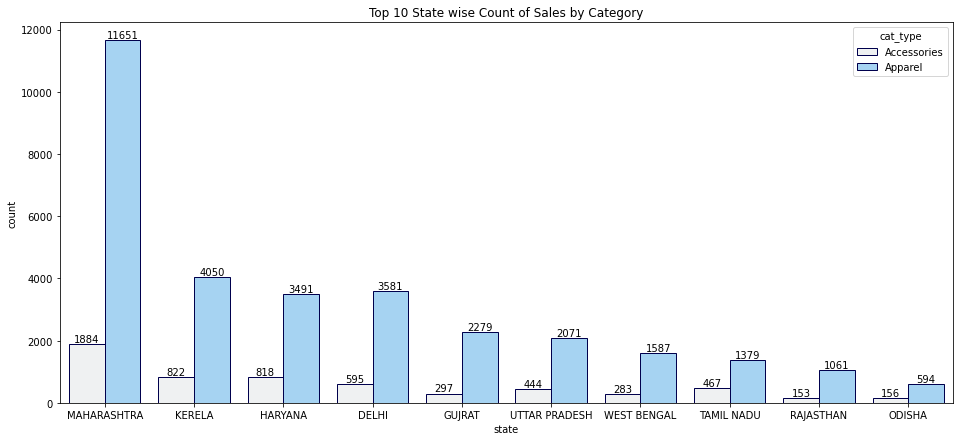

In [28]:
plt.figure(figsize=(16,7))
ax=sns.countplot(x=df.state,hue=df.cat_type,color='#99d6ff',edgecolor="#00004d",order=df.state.value_counts().iloc[:10].index)
plt.title('Top 10 State wise Count of Sales by Category')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Apparel category is Highest selling category in top 10 states.

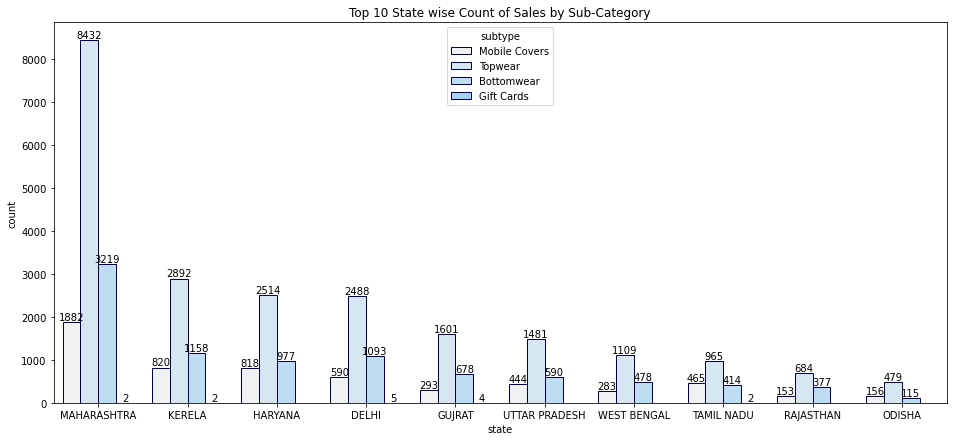

In [29]:
plt.figure(figsize=(16,7))
ax=sns.countplot(x=df.state,hue=df.subtype,color='#99d6ff',edgecolor="#00004d",order=df.state.value_counts().iloc[:10].index)
plt.title('Top 10 State wise Count of Sales by Sub-Category')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Customers from top 10 states usually purchase top wear products like T-Shirts,Jackets etc.

Gift cards are least selling products.

### city column

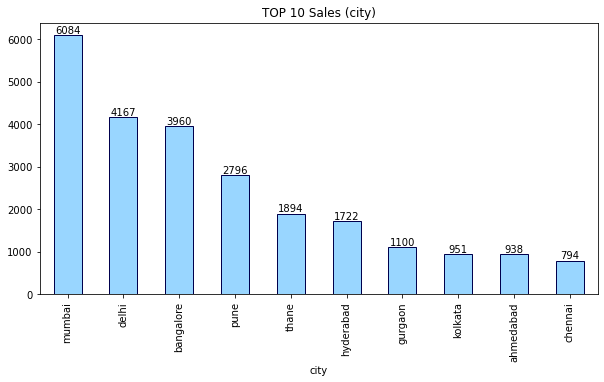

In [30]:
plt.figure(figsize=(10,5))
ax=(df.groupby(['city'])['quantity'].count()).nlargest(n=10).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('TOP 10 Sales (city)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Mumbai, Delhi and, Bangalore are top 3 cities.

All top 10 cities are tier 1 cities.

Out of 10 top cities 3 are from Maharashtra (top state).

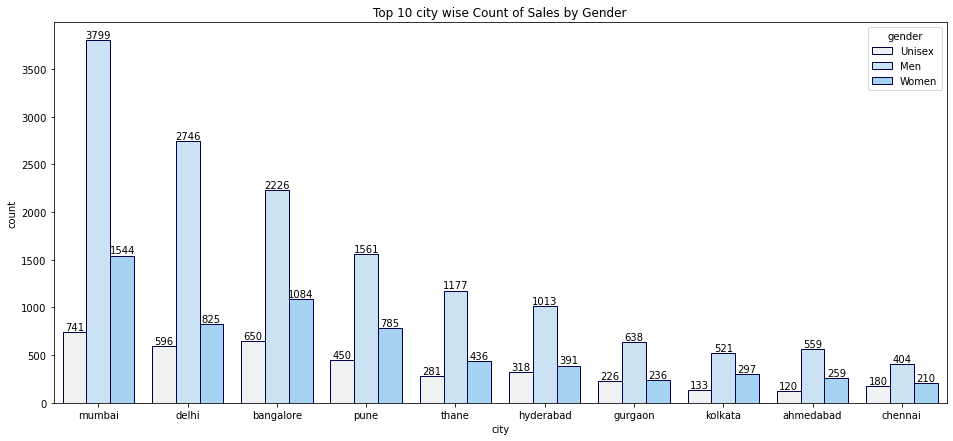

In [31]:
plt.figure(figsize=(16,7))
ax=sns.countplot(x=df.city,hue=df.gender,color='#99d6ff',edgecolor="#00004d",order=df.city.value_counts().iloc[:10].index)
plt.title('Top 10 city wise Count of Sales by Gender')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Products for men are highest selling in top cities.

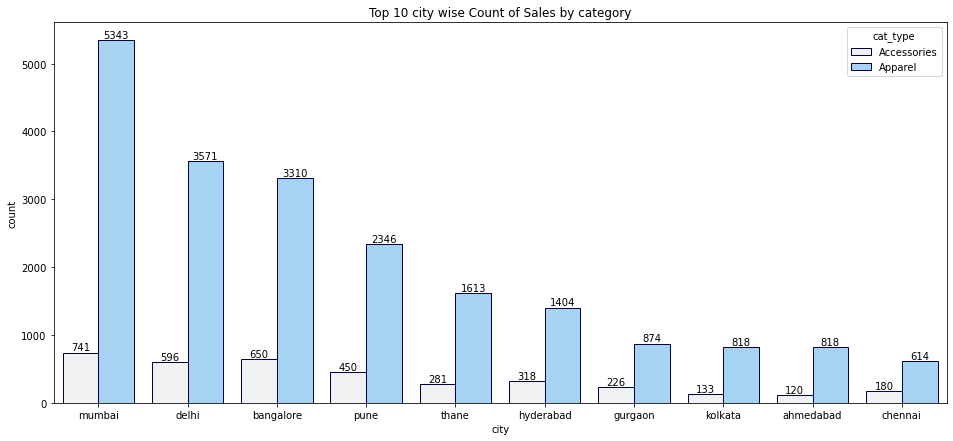

In [32]:
plt.figure(figsize=(16,7))
ax=sns.countplot(x=df.city,hue=df.cat_type,color='#99d6ff',edgecolor="#00004d",order=df.city.value_counts().iloc[:10].index)
plt.title('Top 10 city wise Count of Sales by category')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Top selling category is apparel in all top cities.

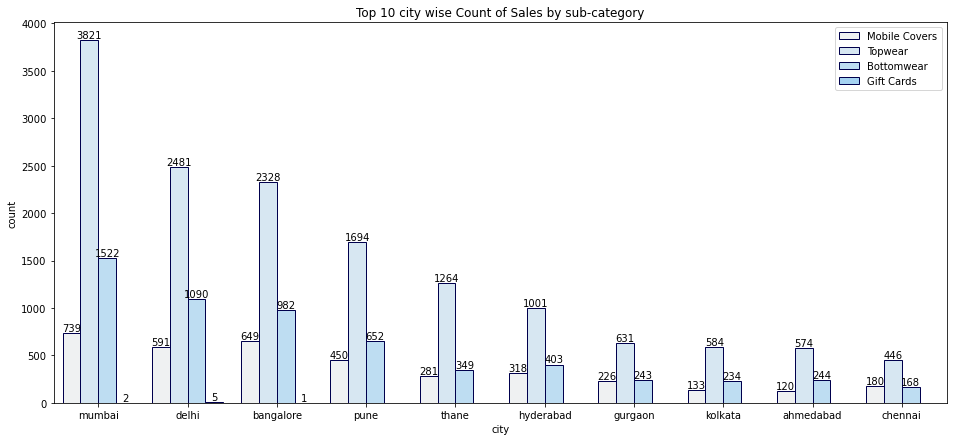

In [33]:
plt.figure(figsize=(16,7))
ax=sns.countplot(x=df.city,hue=df.subtype,color='#99d6ff',edgecolor="#00004d",order=df.city.value_counts().iloc[:10].index)
plt.title('Top 10 city wise Count of Sales by sub-category')
ax.legend(loc='upper right')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

In top cities people mainly buy topwear apparel.

In Accessories category Mobile covers are highest selling products.

# Problem Statements Based Analysis

#### 1.	The top 3 cities that the company should target. Suggest where the company may launch their first offline stores with the product that they may sell at their first offline store. Also, suggest the same for the online web store. Top cities on which they should focus the most and the type of apparel.


a.	Top categories and types

Answer: The top Category in Top 3 cities is Apparel >80% of sales.

b.	Top products

Answer: The Top selling products in all top 3 cities are:

        1. Men's printed T-Shirts
        
        2. Men's printed full sleeve T-Shirts
        
        3. Womens Printed 3/4 sleeve T-Shirts
        
        These 3 products are in top 5 highest selling products in all top 3 cities.

c.	Top product type

Answer: The Highest selling procut type is topwear in all top 3 cities.


In [34]:
df.groupby(['city'])['price'].sum().nlargest(n=3)

city
mumbai       6084000
delhi        4167000
bangalore    3960000
Name: price, dtype: int64

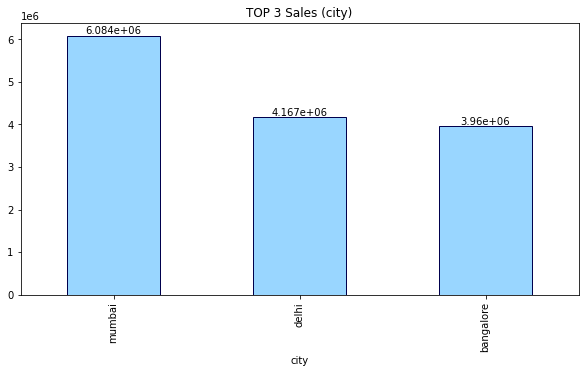

In [35]:
plt.figure(figsize=(10,5))
ax=(df.groupby(['city'])['price'].sum()).nlargest(n=3).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('TOP 3 Sales (city)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Mumbai

In [36]:
df[df.city=='mumbai'].groupby('cat_type').price.sum()

cat_type
Accessories     741000
Apparel        5343000
Name: price, dtype: int64

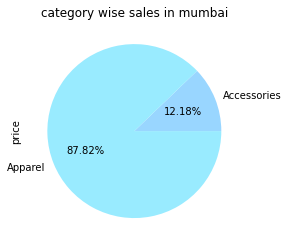

In [37]:
ax=df[df.city=='mumbai'].groupby('cat_type').price.sum().plot.pie(colors=['#99d6ff','#99ebff'],autopct="%.2f%%")
plt.title('category wise sales in mumbai')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

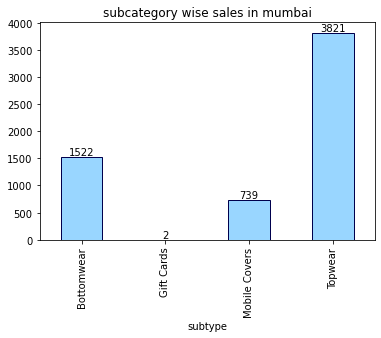

In [38]:
ax=df[df.city=='mumbai'].groupby('subtype').quantity.sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('subcategory wise sales in mumbai')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

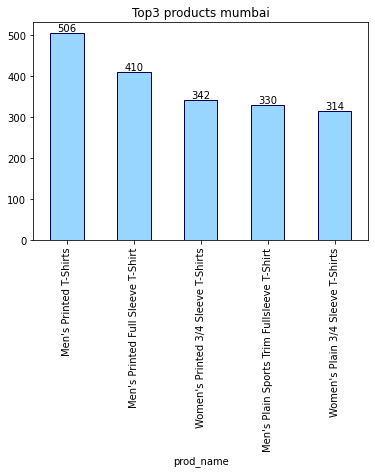

In [39]:
ax=df[df.city=='mumbai'].groupby('prod_name').quantity.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top3 products mumbai')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Mumbai is the city with maximum ordes and highest sales.

2. Most selling category in mumbai is Apparel.

3. Most sellingb subcategory in mumbai is topwear.

4. 3 Highest selling products are.

   a. Men's printed T-Shirts
   
   b. Mens printed full sleeve T-Shirts.
   
   c. Womens Printed 3/4 sleeve T-Shirts.
   
   d. Men's plain sports trim T-Shirts.
   
   e. Womens plain 3/4 sleeve T-Shirts.
   
 Out of 5 high selling products 3 are for mens.
   
   

### Delhi

In [40]:
df[df.city=='delhi'].groupby('cat_type').price.sum()

cat_type
Accessories     596000
Apparel        3571000
Name: price, dtype: int64

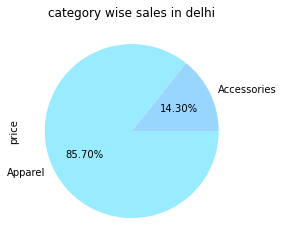

In [41]:
ax=df[df.city=='delhi'].groupby('cat_type').price.sum().plot.pie(colors=['#99d6ff','#99ebff'],autopct="%.2f%%")
plt.title('category wise sales in delhi')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

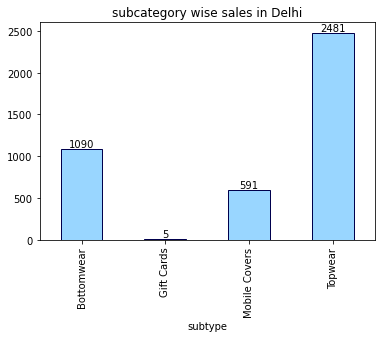

In [42]:
ax=df[df.city=='delhi'].groupby('subtype').quantity.sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('subcategory wise sales in Delhi')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

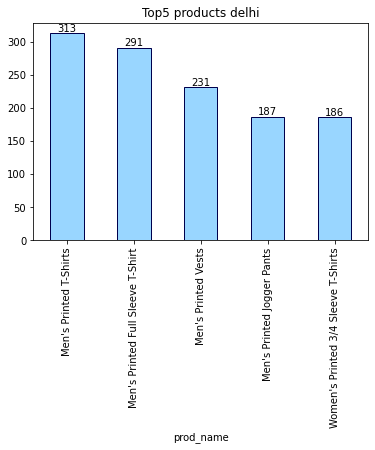

In [43]:
ax=df[df.city=='delhi'].groupby('prod_name').quantity.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top5 products delhi')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Delhi is the city with maximum ordes and highest sales.

2. Most selling category in Delhi is Apparel.

3. Most sellingb subcategory in Delhi is topwear.

4. 3 Highest selling products are.

   a. Men's printed T-Shirts
   
   b. Men's printed full sleeve T-Shirts.
   
   c.  Men's printed Vests.
   
   d. Men's printed Jogger Pants.
   
   e. Womens Printed 3/4 sleeve T-Shirts.
   
  out of top 5 products in Delhi 4 are for men and one product from bottom wear is also high selling.

### Bangalore

In [44]:
df[df.city=='bangalore'].groupby('cat_type').price.sum()

cat_type
Accessories     650000
Apparel        3310000
Name: price, dtype: int64

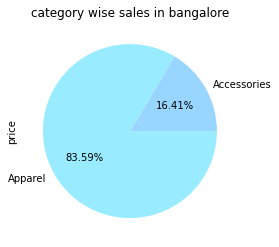

In [45]:
ax=df[df.city=='bangalore'].groupby('cat_type').price.sum().plot.pie(colors=['#99d6ff','#99ebff'],autopct="%.2f%%")
plt.title('category wise sales in bangalore')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

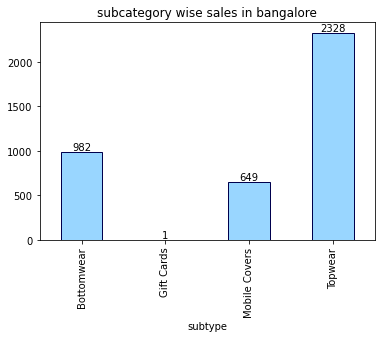

In [46]:
ax=df[df.city=='bangalore'].groupby('subtype').quantity.sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('subcategory wise sales in bangalore')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

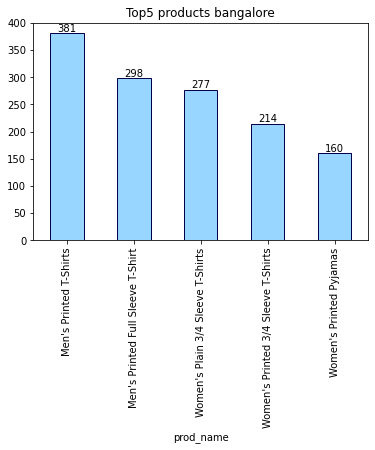

In [47]:
ax=df[df.city=='bangalore'].groupby('prod_name').quantity.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top5 products bangalore')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

1. Bangalore is the city with maximum ordes and highest sales.

2. Most selling category in Bangalore is Apparel.

3. Most sellingb subcategory in Bangalore is topwear.

4. 3 Highest selling products are.

   a. Men's printed T-Shirts
   
   b. Men's printed full sleeve T-Shirts.
   
   c. Womens Plain 3/4 sleeve T-Shirts.
   
   d. Womens Printed 3/4 sleeve T-Shirts.
   
   e. Womens Printed Pyjamas.
   
  out of top 5 products in Bangalore 3 are for women and one product from bottom wear is also high selling.

#### 2.	What insights can you offer about new and returning customers? 
a.	Analyze the old customers based on RFM(Recency, Frequency, and Monetary Value)

b.	Analyze the new customers.

c.	Find what the old and new customers are buying, at what time they are buying, and at what day of the month they are buying?


#### a.	Analyze the old customers based on RFM(Recency, Frequency, and Monetary Value)

Customers who have placed multiple orders are returning/old customers and customers with 1 order are new customers.

In [48]:
# counting number of purcahses made by a customer
frequency_df = df.drop_duplicates().groupby(
    by=['user_id'], as_index=False)['created_at'].count()
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
0,18,1
1,26,6
2,79,3
3,229,1
4,358,1


In [49]:
freqmerged=pd.merge(df,frequency_df,how='inner',on='user_id')

In [50]:
old_customers=freqmerged[freqmerged.Frequency!=1]

In [51]:
old_customers=old_customers.drop(old_customers.columns[[-1]],axis=1)

In [52]:
old_customers.head()

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,prod_name,created_at,city,state,day,weekday,dow,hour
0,27288,3550739,0,44879,1000,1,34584,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,OnePlus One Mobile Covers,2016-01-01 00:07:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0
1,27353,3628949,0,44879,1000,1,62332,19,382,Accessories,Mobile Covers,Unisex,Mobile Covers,OnePlus One Mobile Covers,2016-01-21 17:03:00,mumbai,MAHARASHTRA,2016-01-21,Thursday,Thursday,17
3,29144,3550745,0,1221355,1000,1,26898,4,456,Apparel,Bottomwear,Men,Pyjamas,Men's Plain Pyjamas,2016-01-01 00:12:00,ghaziabad,UTTAR PRADESH,2016-01-01,Friday,Friday,0
4,16576,3550747,3550745,1221355,1000,1,41284,2,200,Apparel,Topwear,Men,T-Shirts,Men's Plain Full Sleeve T-Shirts,2016-01-01 00:13:00,ghaziabad,UTTAR PRADESH,2016-01-01,Friday,Friday,0
5,34189,3550749,3550745,1221355,1000,1,53238,2,570,Apparel,Topwear,Men,T-Shirts,Men's Plain Sports Trim Fullsleeve T-Shirt,2016-01-01 00:13:00,ghaziabad,UTTAR PRADESH,2016-01-01,Friday,Friday,0


In [53]:
new_customers=freqmerged[freqmerged.Frequency==1]

In [54]:
new_customers.head()

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,prod_name,created_at,city,state,day,weekday,dow,hour,Frequency
2,38337,3550743,0,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
13,3524,3550769,0,869375,1000,1,938,1,122,Apparel,Bottomwear,Women,Pyjamas,Women's Printed Pyjamas,2016-01-01 00:27:00,delhi,DELHI,2016-01-01,Friday,Friday,0,1
17,17334,3550779,0,1037635,1000,1,5378,19,224,Accessories,Mobile Covers,Unisex,Mobile Covers,Moto E Mobile Covers,2016-01-01 00:31:00,katni,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
18,28112,3550783,0,1627365,1000,1,26280,19,422,Accessories,Mobile Covers,Unisex,Mobile Covers,Xiaomi Mi 4i Mobile Covers,2016-01-01 00:40:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
22,10816,3550791,0,1626037,1000,1,57490,2,156,Apparel,Bottomwear,Men,Boxers,Men's Half Printed Boxers,2016-01-01 00:48:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1


### ANALYSIS OF OLD CUSTOMERS

In [55]:
old_customers.user_id .nunique()

9805

There are total 9805 old/repeating customers.

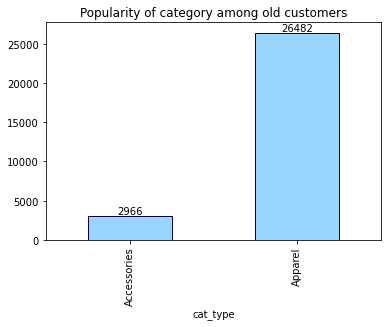

In [56]:
ax=old_customers.groupby('cat_type').quantity.count().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Popularity of category among old customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Repeating customers mainly order apparel and less interseted in Accessories.

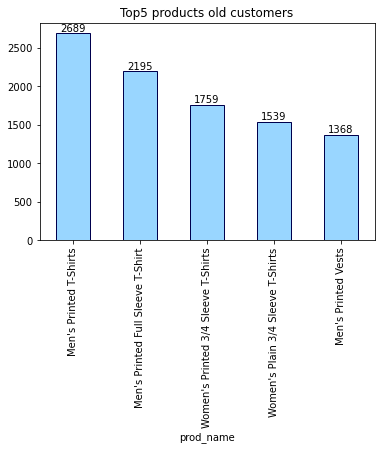

In [57]:
ax=old_customers.groupby('prod_name').quantity.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top5 products old customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

All top5 products for old customers are apparel.

Out of 5 top products 3 are for males so we can assume mens are purchasing more.

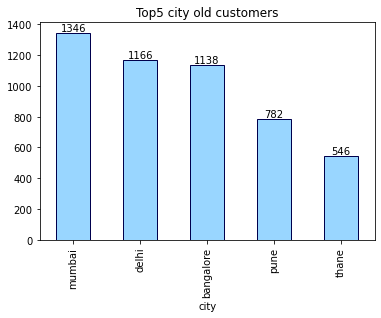

In [58]:
ax=new_customers.groupby('city').user_id.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top5 city old customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Old customers are mainly from Maharashtra state. 3 cities in top 5.

Good response from Delhi and Bangalore as well.

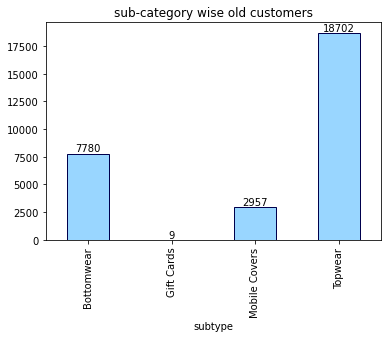

In [59]:
ax=old_customers.groupby('subtype').quantity.sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('sub-category wise old customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Old customers mainly purchase topwears and bottom wear as we can see these two are highest selling sub categories.

### RFM ANALYSIS OF OLD CUSTOMERS

In [60]:
# calculating recency

df_recency = old_customers.groupby(by='user_id',
                        as_index=False)['created_at'].max()
df_recency.columns = ['user_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()


,user_id,LastPurchaseDate,Recency
0,26,2016-01-29 11:19:00,1
1,79,2016-01-04 17:14:00,26
2,1113,2016-01-26 02:00:00,4
3,1234,2016-01-14 09:08:00,16
4,1994,2016-01-25 12:42:00,5


In [61]:
# calculating frequency

frequency_df = old_customers.drop_duplicates().groupby(
    by=['user_id'], as_index=False)['created_at'].count()
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
0,26,6
1,79,3
2,1113,2
3,1234,3
4,1994,4


In [62]:
# calculating monetary value
old_customers['Total'] = old_customers['price']*old_customers['quantity']
monetary_df = old_customers.groupby(by='user_id', as_index=False)['Total'].sum()
monetary_df.columns = ['user_id', 'Monetary']
monetary_df.head()

,user_id,Monetary
0,26,6000
1,79,3000
2,1113,2000
3,1234,3000
4,1994,4000


In [63]:
# Merging all three columns in one dataframe
rf_df = df_recency.merge(frequency_df, on='user_id')
rfm_df = rf_df.merge(monetary_df, on='user_id').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,user_id,Recency,Frequency,Monetary
0,26,1,6,6000
1,79,26,3,3000
2,1113,4,2,2000
3,1234,16,3,3000
4,1994,5,4,4000


In [64]:
# Ranking Customer’s based upon their recency, frequency, and monetary score

rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,26,1,6,6000,95.826386,94.803672,94.803672
1,79,26,3,3000,9.170488,66.297807,66.297807
2,1113,4,2,2000,84.649854,27.475778,27.475778
3,1234,16,3,3000,42.517716,66.297807,66.297807
4,1994,5,4,4000,80.825344,82.876084,82.876084


In [65]:
# calculating RFM score

rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['user_id', 'RFM_Score']].head(7)

,user_id,RFM_Score
0,26,4.75
1,79,2.89
2,1113,1.80
3,1234,3.14
4,1994,4.13
5,2353,2.91
6,2425,4.33


#### Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [66]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Customer_segment']].head(20)

,user_id,RFM_Score,Customer_segment
0,26,4.75,Top Customers
1,79,2.89,Low Value Customers
2,1113,1.80,Low Value Customers
3,1234,3.14,Medium Value Customer
4,1994,4.13,High value Customer
5,2353,2.91,Low Value Customers
6,2425,4.33,High value Customer
7,2565,1.80,Low Value Customers
8,2695,3.57,Medium Value Customer
9,3037,2.93,Low Value Customers


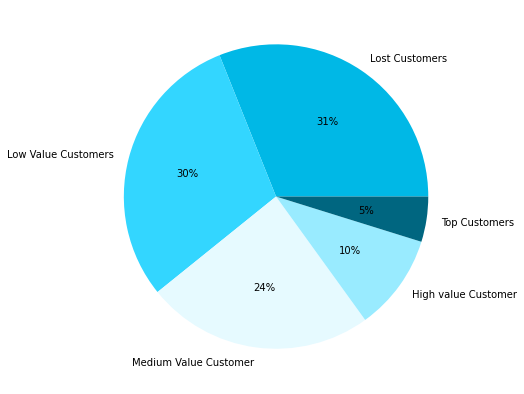

In [67]:
plt.figure(figsize=(7,7))
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%',colors= ["#00b8e6",'#33d6ff','#e6faff','#99ebff','#006680'])
plt.show()

Insights:
    
From RFM Analysis we can see that from all the returning customers only 5% are top customers,10% are high value customers and
24% are Medium value customers and 30% are low value customers and 31% of customers are lost.

### b.	Analyze the new customers.

In [68]:
new_customers.head()

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,subtype,gender,subclass,prod_name,created_at,city,state,day,weekday,dow,hour,Frequency
2,38337,3550743,0,1627343,1000,1,61354,3,622,Apparel,Topwear,Men,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,2016-01-01 00:11:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
13,3524,3550769,0,869375,1000,1,938,1,122,Apparel,Bottomwear,Women,Pyjamas,Women's Printed Pyjamas,2016-01-01 00:27:00,delhi,DELHI,2016-01-01,Friday,Friday,0,1
17,17334,3550779,0,1037635,1000,1,5378,19,224,Accessories,Mobile Covers,Unisex,Mobile Covers,Moto E Mobile Covers,2016-01-01 00:31:00,katni,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
18,28112,3550783,0,1627365,1000,1,26280,19,422,Accessories,Mobile Covers,Unisex,Mobile Covers,Xiaomi Mi 4i Mobile Covers,2016-01-01 00:40:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1
22,10816,3550791,0,1626037,1000,1,57490,2,156,Apparel,Bottomwear,Men,Boxers,Men's Half Printed Boxers,2016-01-01 00:48:00,mumbai,MAHARASHTRA,2016-01-01,Friday,Friday,0,1


### ANALYSIS OF NEW CUSTOMERS

In [69]:
new_customers.user_id .nunique()

12278

There are total 12278 new customers in month of January 2016.

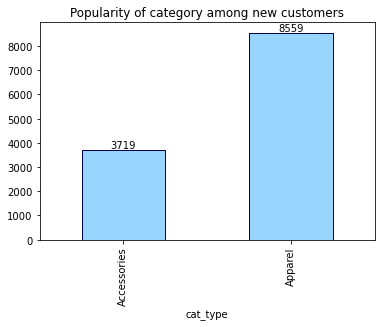

In [70]:
ax=new_customers.groupby('cat_type').quantity.count().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Popularity of category among new customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insighs:

New customers are Ordering Apparel more but there is good response in Accessories as well when compared to old customers.

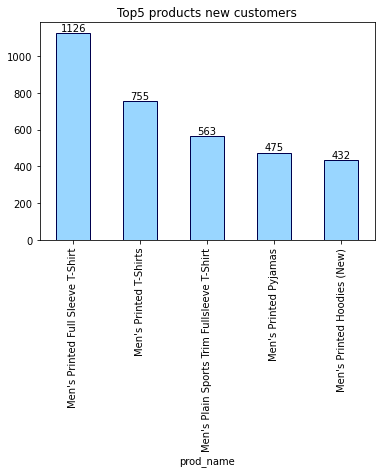

In [71]:
ax=new_customers.groupby('prod_name').quantity.count().nlargest(n=5).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Top5 products new customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

The top5 products for new customers are all for mens and topwears.

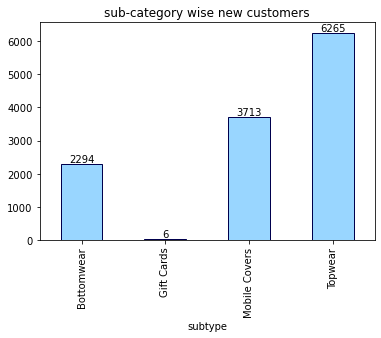

In [72]:
ax=new_customers.groupby('subtype').quantity.sum().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('sub-category wise new customers')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

New customers buy Topwear and Mobile covers more than any other things.

### c.	Find what the old and new customers are buying, at what time they are buying, and at what day of the month they are buying?

##### new customers

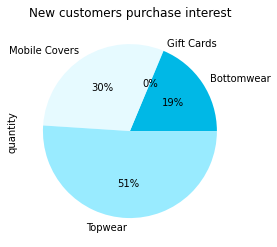

In [73]:
ax=new_customers.groupby('subtype').quantity.sum().plot.pie(autopct='%.0f%%',colors= ["#00b8e6",'#33d6ff','#e6faff','#99ebff'])
plt.title('New customers purchase interest')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Most of new customers 51% are buying Topwear and 2nd highest selling products are Mobile covers.

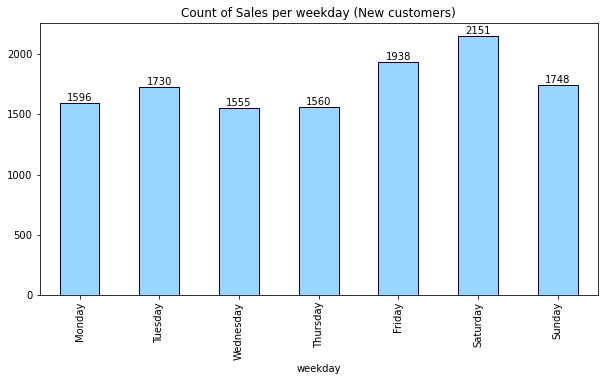

In [74]:
plt.figure(figsize=(10,5))
ax=new_customers.groupby('weekday')['quantity'].count().reindex(weekdays).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per weekday (New customers)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Most of new customers makes purchases on weekends. 

Maximum orders were observed on saturday.

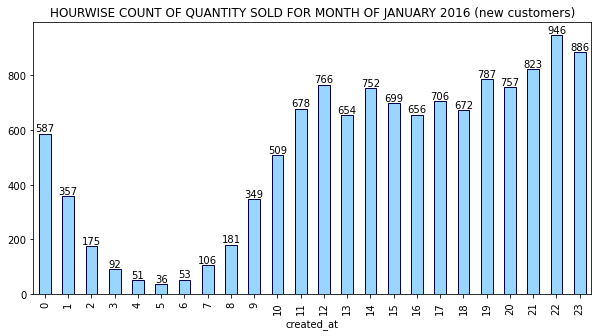

In [75]:
plt.figure(figsize=(10,5))
ax=new_customers.groupby([new_customers ['created_at'].dt.hour]).order_id.count().plot(kind="bar",color='#99d6ff',edgecolor="#00004d")
plt.title("HOURWISE COUNT OF QUANTITY SOLD FOR MONTH OF JANUARY 2016 (new customers)")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Most number of orders were observed between 21:00 to 23:00,

Least number of sales were observed after 1:00 a.m. and in early morning.

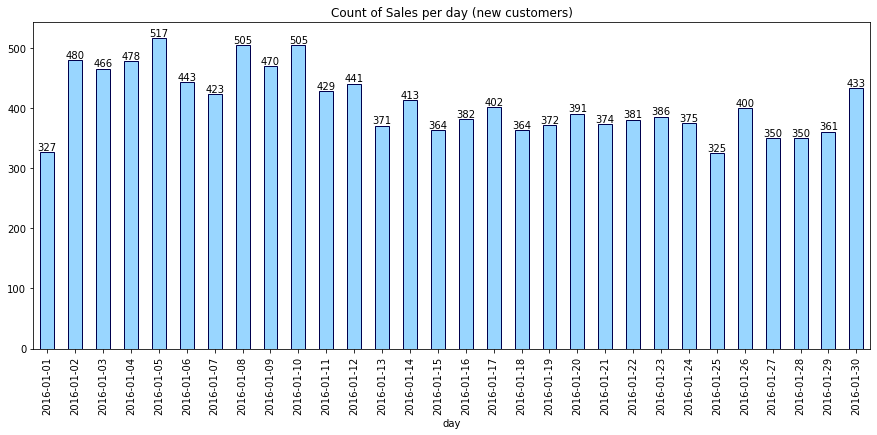

In [76]:
plt.figure(figsize=(15,6))
new_customers['day'] = pd.to_datetime(new_customers['created_at']).dt.to_period('D')
ax=new_customers.groupby('day')['quantity'].count().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per day (new customers)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Starting of month (01-01-2016 to 10-01-2016) has more sales as compared to other days
    
On 05-01-2016 maximum order by new customers are observed.

##### old customers

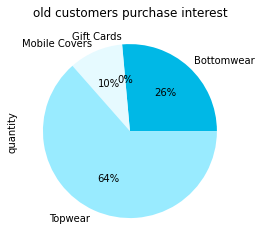

In [77]:
ax=old_customers.groupby('subtype').quantity.sum().plot.pie(autopct='%.0f%%',colors= ["#00b8e6",'#33d6ff','#e6faff','#99ebff'])
plt.title('old customers purchase interest')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Most of old customers 64% are buying Topwear and 2nd highest selling products are Bottomwear.

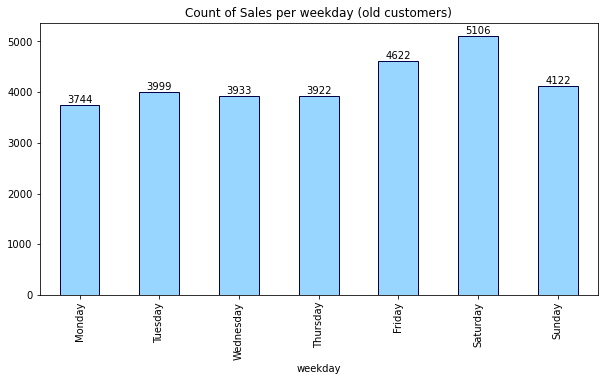

In [78]:
plt.figure(figsize=(10,5))
ax=old_customers.groupby('weekday')['quantity'].count().reindex(weekdays).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per weekday (old customers)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Most of old customers makes purchases on weekends. 

Maximum orders were observed on saturday.

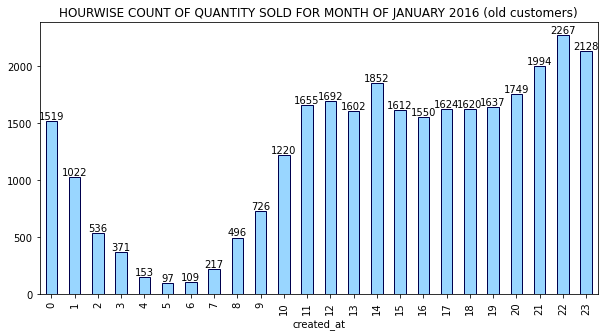

In [79]:
plt.figure(figsize=(10,5))
ax=old_customers.groupby([old_customers ['created_at'].dt.hour]).order_id.count().plot(kind="bar",color='#99d6ff',edgecolor="#00004d")
plt.title("HOURWISE COUNT OF QUANTITY SOLD FOR MONTH OF JANUARY 2016 (old customers)")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Most number of orders were observed between 21:00 to 23:00,

Least number of sales were observed after 1:00 a.m. and in early morning lowest at 5 and gradually starts increasing as day passes.

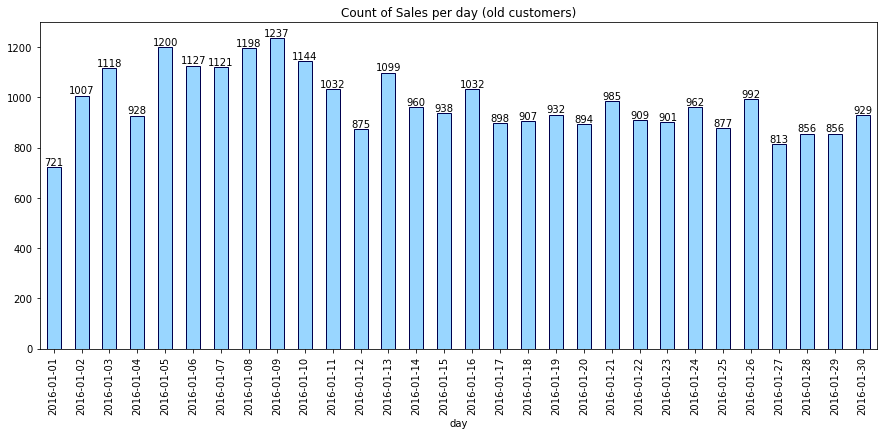

In [80]:
plt.figure(figsize=(15,6))
old_customers['day'] = pd.to_datetime(old_customers['created_at']).dt.to_period('D')
ax=old_customers.groupby('day')['quantity'].count().plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per day (old customers)')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Insights:

Starting of month (01-01-2016 to 10-01-2016) has more sales as compared to other days
    
On 09-01-2016 maximum order by new customers are observed.

### 3.	What are some interesting insights that you can infer from the data?

1. Customers tend to purchase more on weekends.

2. Customers purchase more in first week of the month as they got salary to spent.

3. People use our online store to purchase topwear apparel more.

4. From Maharashtra state we get highest number of orders.

5. Tier 1 cities are top 10 cities.

6. Returning customers are less but they purchase more.



### 4.	Is it fine to launch offers on weekdays or weekends?

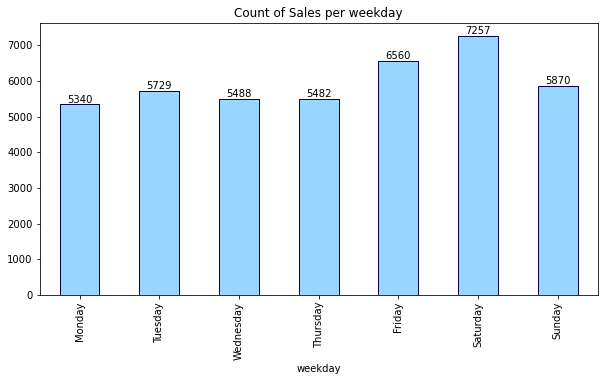

In [81]:
plt.figure(figsize=(10,5))
ax=df.groupby('weekday')['quantity'].count().reindex(weekdays).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Count of Sales per weekday')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

As we can see sales on weekends are high so we can launch offers like weekends sales on weekends to increase volume of sales even more.

For the weekdays we can introduce sales like bigbazar discount wednesdays to increase sales on weekdays too.

### 5.	Which day of the month gets them the best sales?

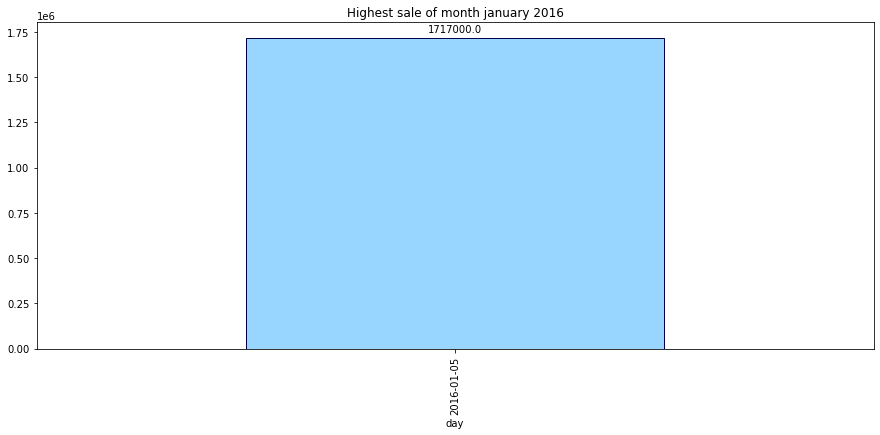

In [82]:
plt.figure(figsize=(15,6))
df['day'] = pd.to_datetime(df['created_at']).dt.to_period('D')
ax=df.groupby('day')['price'].sum().nlargest(1).plot.bar(color='#99d6ff',edgecolor="#00004d")
plt.title('Highest sale of month january 2016')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

The highest sale of month was observed on 05-01-2016

### 6.	At what time of the day their website gets the maximum impressions? (Number of orders)

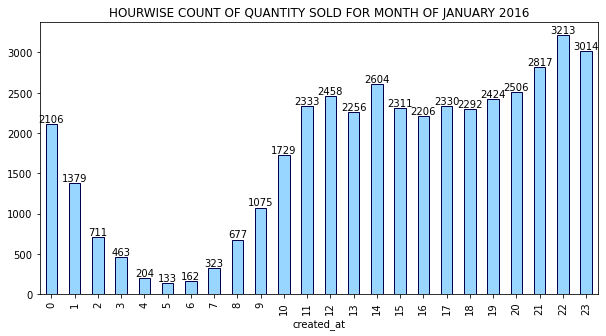

In [83]:
plt.figure(figsize=(10,5))
ax=df.groupby([df ['created_at'].dt.hour]).order_id.count().plot(kind="bar",color='#99d6ff',edgecolor="#00004d")
plt.title("HOURWISE COUNT OF QUANTITY SOLD FOR MONTH OF JANUARY 2016")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Maximum number of orders on website is placed usually on night at 10:00 pm to 11:00 pm

### 7.	Are men placing more orders than women?

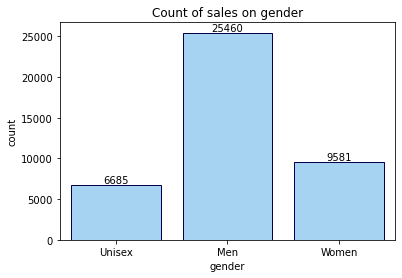

In [84]:
cnt=sns.countplot(df.gender,color='#99d6ff',edgecolor="#00004d")
plt.title('Count of sales on gender')
for i in cnt.containers:
    cnt.bar_label(i)
plt.show()

As we can see products for mens are being purchased more so we can say that mens are purchasing more than womens.

### 8.	Is it a good idea for the company to open an offline store at this early stage of its startup journey?

###### If we want we can open stores in any one of top 3 cities in Maharashtra, Mumbai is preffered, while focusing more on topwear apparel sagement because 3 of top 10 cities are in Maharashtra only and demand for topwear apparel is good there. But for other states and cities it would be not good to open offline stores because sales are comparitively less, so i would suggest to take some time establish the brand name and gain more customers as the sales increase we can study the demand and customer type in that area after that it will be benificial to open offline stores.